In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [4]:
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from tqdm import tqdm

In [5]:
def load_california_housing(test_size=0.25, random_state=23923):
    X, y = fetch_california_housing(return_X_y=True)
    return train_test_split(X, y, random_state=random_state, test_size=test_size)

In [6]:
def load_california_housing_with_validation(test_size, val_size, random_state=23923):
    X, y = fetch_california_housing(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size + val_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=random_state, test_size=val_size / (1 - test_size))
    return X_train, X_test, X_val, y_train, y_test, y_val

In [7]:
def train_gradient_boosting_sklearn(X_train, y_train, random_state=23923):
    arguments_grid = {
        'n_estimators' : range(100, 2001, 200),
        'max_depth': np.arange(2, 11),
        'learning_rate' : [0.001, 0.01, 0.1]
    }
    reg = GradientBoostingRegressor(random_state=random_state)
    grid_reg = GridSearchCV(reg, arguments_grid, verbose=5, cv=5, n_jobs=4)
    grid_reg.fit(X_train, y_train)
    print(f'Best params set: {grid_reg.best_params_}')
    return grid_reg.best_params_

In [8]:
def build_plot(x, ys, label_x='', label_y='', title=''):
    plt.clf()
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    for y_label, y in ys.items():
        plt.plot(x, y, label=y_label)
    plt.legend()
    plt.show()

In [9]:
def get_scores(model, params, param, param_range, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    for param_value in tqdm(param_range):
        current_params = params.copy()
        current_params[param] = param_value
        reg = model(**current_params).fit(X_train, y_train)
        train_scores.append(reg.score(X_train, y_train))
        test_scores.append(reg.score(X_test, y_test))
    return train_scores, test_scores

In [10]:
def print_results(reg, X_train, X_val, X_test, y_train, y_val, y_test):
    for X_, y_, label  in [(X_train, y_train, 'Train'), (X_val, y_val, 'Val'), (X_test, y_test, 'Test')]:
        print(f'{label} scores:')
        print(f'R2: {reg.score(X_, y_)}')

In [11]:
X_train, X_test, y_train, y_test = load_california_housing()

In [ ]:
reg = train_gradient_boosting_sklearn(X_train, y_train)

In [28]:
reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, random_state=23923).fit(X_train, y_train)

In [31]:
reg.score(X_train, y_train)

0.98703777241677

In [30]:
reg.score(X_test, y_test)

0.8477837257882671

In [9]:
best_params = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 1000}

#### max_depth learning curve

In [55]:
train_scores, test_scores = get_scores(GradientBoostingRegressor, best_params, 'max_depth', range(2, 11),
                                      X_train, X_test, y_train, y_test)

100%|██████████| 9/9 [08:00<00:00, 53.35s/it]


<IPython.core.display.Javascript object>


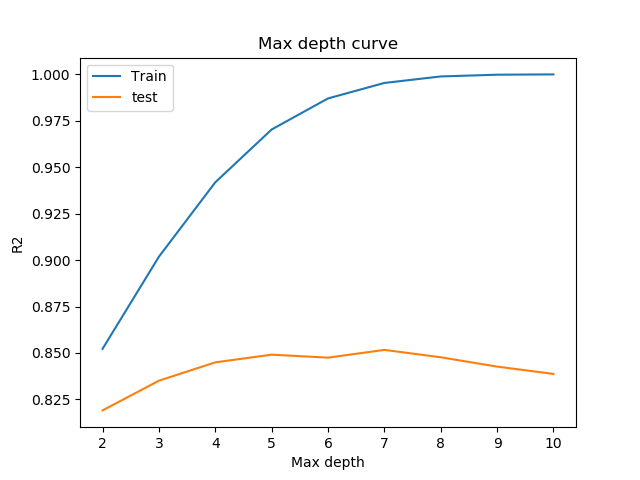

In [59]:
build_plot(range(2, 11), {'Train' : train_scores, 'test' : test_scores}, 'Max depth', 'R2', 'Max depth curve')

#### n_estimators

In [61]:
train_scores, test_scores = get_scores(GradientBoostingRegressor, best_params, 'n_estimators', range(100, 1001, 100),
                                      X_train, X_test, y_train, y_test)

100%|██████████| 10/10 [04:49<00:00, 28.96s/it]


<IPython.core.display.Javascript object>


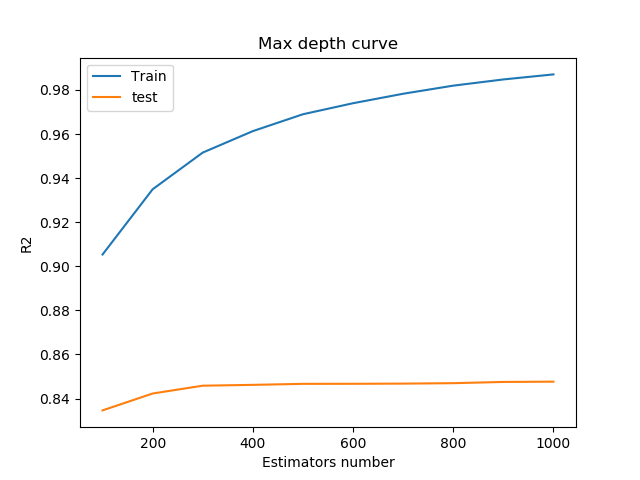

In [62]:
build_plot(range(100, 1001, 100), {'Train' : train_scores, 'test' : test_scores}, 'Estimators number', 'R2', 'Estimators number curve')

#### Learning rate

In [64]:
train_scores, test_scores = get_scores(GradientBoostingRegressor, best_params, 'learning_rate', np.arange(0.01, 0.101, 0.01),
                                      X_train, X_test, y_train, y_test)

 30%|███       | 3/10 [03:01<06:57, 59.69s/it]

KeyboardInterrupt: 

In [ ]:
build_plot(np.arange(0.01, 0.101, 0.01), {'Train' : train_scores, 'test' : test_scores}, 'Learning rate', 'R2', 'Learning rate curve')

In [10]:
train_scores, test_scores = get_scores(GradientBoostingRegressor, best_params, 'n_estimators', range(100, 5001, 100),
                                      X_train, X_test, y_train, y_test)

100%|██████████| 50/50 [2:00:06<00:00, 144.13s/it]


<IPython.core.display.Javascript object>


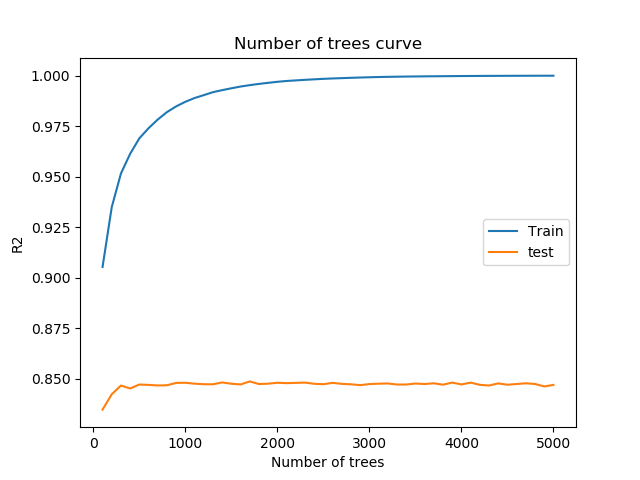

In [11]:
build_plot(np.arange(100, 5001, 100), {'Train' : train_scores, 'test' : test_scores}, 'Number of trees', 'R2', 'Number of trees curve')

In [16]:
np.arange(100, 5001, 100)[np.argmax(test_scores)]

1700

In [9]:
random_state = 23923

In [23]:
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

In [24]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y,
                                                                                        test_size=0.3)
diabetes_X_test, diabetes_X_val, diabetes_y_test, diabetes_y_val = train_test_split(diabetes_X_test, 
                                                                                    diabetes_y_test,
                                                                                    test_size=0.5)

In [27]:
diabetes_best_params = train_gradient_boosting_sklearn(diabetes_X_train, diabetes_y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 178 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done 304 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 466 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 664 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 898 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 1168 tasks      | elapsed:  4.7min


Best params set: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}


[Parallel(n_jobs=4)]: Done 1350 out of 1350 | elapsed:  5.1min finished


In [41]:
diabetes_best_params_tuned = diabetes_best_params.copy()

100%|██████████| 10/10 [00:03<00:00,  3.22it/s]


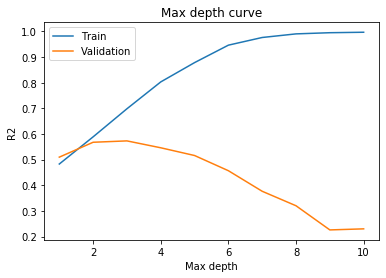

In [42]:
param_range = np.arange(1, 11, 1)
train_scores, val_scores = get_scores(GradientBoostingRegressor, diabetes_best_params, 'max_depth', param_range,
                                      diabetes_X_train, diabetes_X_val, diabetes_y_train, diabetes_y_val)
build_plot(param_range, {'Train' : train_scores, 'Validation' : val_scores}, 'Max depth', 'R2', 'Max depth curve')
diabetes_best_params_tuned['max_depth'] = param_range[np.argmax(val_scores)]

100%|██████████| 181/181 [00:49<00:00,  3.63it/s]


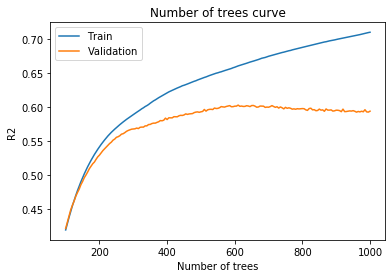

In [43]:
param_range = np.arange(100, 1001, 5)
train_scores, val_scores = get_scores(GradientBoostingRegressor, diabetes_best_params, 'n_estimators', param_range,
                                      diabetes_X_train, diabetes_X_val, diabetes_y_train, diabetes_y_val)
build_plot(param_range, {'Train' : train_scores, 'Validation' : val_scores}, 'Number of trees', 'R2', 'Number of trees curve')
diabetes_best_params_tuned['n_estimators'] = param_range[np.argmax(val_scores)]

100%|██████████| 200/200 [01:09<00:00,  2.86it/s]


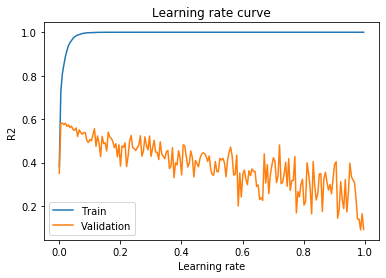

In [44]:
param_range = np.arange(0.001, 1, 0.005)
train_scores, val_scores = get_scores(GradientBoostingRegressor, diabetes_best_params_tuned, 'learning_rate', param_range,
                                      diabetes_X_train, diabetes_X_val, diabetes_y_train, diabetes_y_val)
build_plot(param_range, {'Train' : train_scores, 'Validation' : val_scores}, 'Learning rate', 'R2', 'Learning rate curve')
diabetes_best_params_tuned['learning_rate'] = param_range[np.argmax(val_scores)]

In [45]:
diabetes_reg = GradientBoostingRegressor(**diabetes_best_params).fit(diabetes_X_train, diabetes_y_train)
print_results(diabetes_reg, diabetes_X_train, diabetes_X_val, diabetes_X_test,
              diabetes_y_train, diabetes_y_val, diabetes_y_test)

Train scores:
R2: 0.5888567323306688
Val scores:
R2: 0.5689405291577205
Test scores:
R2: 0.37651713145770027


In [46]:
diabetes_reg_tuned = GradientBoostingRegressor(**diabetes_best_params_tuned).fit(diabetes_X_train, diabetes_y_train)
print_results(diabetes_reg_tuned, diabetes_X_train, diabetes_X_val, diabetes_X_test,
              diabetes_y_train, diabetes_y_val, diabetes_y_test)

Train scores:
R2: 0.8089070417892094
Val scores:
R2: 0.584088024019964
Test scores:
R2: 0.36910597320942595


In [47]:
diabetes_best_params

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}

In [48]:
diabetes_best_params_tuned

{'learning_rate': 0.011, 'max_depth': 3, 'n_estimators': 610}

In [54]:
with open(os.path.join('..', 'resources', 'diabetes.pkl'), 'wb') as output_file:
    pickle.dump((diabetes_reg_tuned, diabetes_X_train, diabetes_X_val, diabetes_X_test,
                diabetes_y_train, diabetes_y_val, diabetes_y_test), output_file)

In [1]:
from catboost import CatBoostClassifier, CatBoostRegressor, monoforest

from sklearn.datasets import load_boston

boston = load_boston()

model = CatBoostRegressor(iterations=5, max_depth=3)
model.fit(boston.data, boston.target)

Learning rate set to 0.5
0:	learn: 6.8194326	total: 48.8ms	remaining: 195ms
1:	learn: 5.2454778	total: 50.4ms	remaining: 75.6ms
2:	learn: 4.5106978	total: 51.8ms	remaining: 34.6ms
3:	learn: 4.1472221	total: 53.4ms	remaining: 13.3ms
4:	learn: 3.9140990	total: 54.5ms	remaining: 0us


In [12]:
diabetes_best_params_tuned = {'learning_rate' : 0.011, 'max_depth' : 3, 'n_estimators': 610}